In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 100,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8765432098765432, Loss: 0.5602903012876157
Checkpoint 20, Accuracy: 0.8827160493827161, Loss: 0.5478249655829536
Checkpoint 30, Accuracy: 0.8827160493827161, Loss: 0.5035350234420212
Checkpoint 40, Accuracy: 0.8765432098765432, Loss: 0.4840943725020797
Checkpoint 50, Accuracy: 0.9382716049382716, Loss: 0.36055112768102576
Checkpoint 60, Accuracy: 0.9259259259259259, Loss: 0.3424515547575774
Checkpoint 70, Accuracy: 0.9382716049382716, Loss: 0.3292817716245298
Checkpoint 80, Accuracy: 0.9320987654320988, Loss: 0.27731460995144314
Checkpoint 90, Accuracy: 0.9444444444444444, Loss: 0.2495426778440122
Checkpoint 100, Accuracy: 0.9382716049382716, Loss: 0.2276439666748047
Checkpoint 110, Accuracy: 0.9567901234567902, Loss: 0.19640731811523438
Checkpoint 120, Accuracy: 0.9567901234567902, Loss: 0.18909330721254702
Checkpoint 130, Accuracy: 0.9629629629629629, Loss: 0.16488184752287688
Checkpoint 140, Accuracy: 0.9691358024691358, Loss: 0.1489323863276729
Checkpoint

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

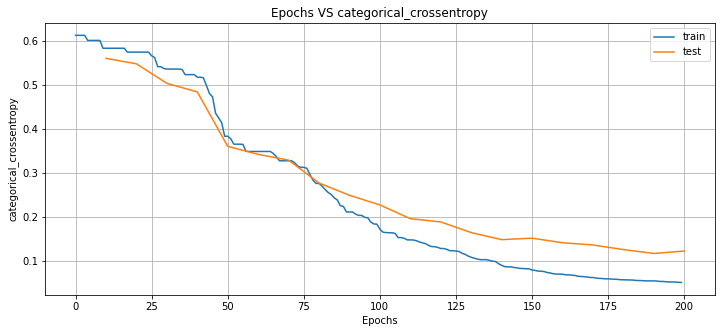

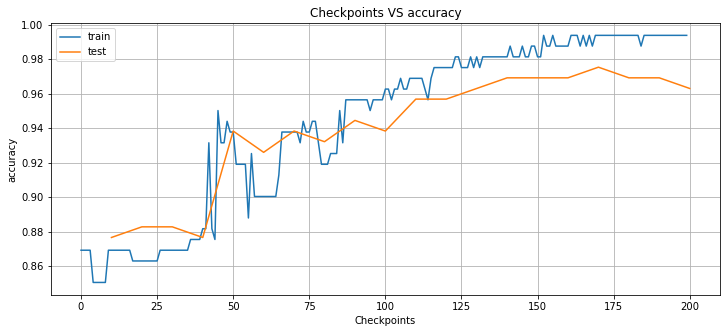

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 0. 1.] <-> [5.1230425e-03 2.7147584e-04 9.9460548e-01]
[1. 0. 0.] <-> [0.9246902  0.06979224 0.00551755]
[1. 0. 0.] <-> [0.9740108  0.00236246 0.02362665]
[1. 0. 0.] <-> [0.89268744 0.10533418 0.00197835]
[0. 0. 1.] <-> [4.9454877e-03 2.6449573e-04 9.9479008e-01]
[1. 0. 0.] <-> [9.8107660e-01 7.4002589e-04 1.8183295e-02]
[1. 0. 0.] <-> [0.98399967 0.00571206 0.01028835]
[0. 1. 0.] <-> [2.3870151e-02 9.7596020e-01 1.6957597e-04]
[1. 0. 0.] <-> [0.99287343 0.00548574 0.00164082]
[1. 0. 0.] <-> [0.99184    0.00332334 0.00483654]
[1. 0. 0.] <-> [9.7730178e-01 6.0510810e-04 2.2093091e-02]
[0. 1. 0.] <-> [4.0078573e-03 9.9593401e-01 5.8057307e-05]
[1. 0. 0.] <-> [9.0698421e-01 7.3010987e-04 9.2285700e-02]
[0. 1. 0.] <-> [4.0381327e-03 9.9590379e-01 5.8042315e-05]
[1. 0. 0.] <-> [9.8814422e-01 8.9565880e-04 1.0960255e-02]
[1. 0. 0.] <-> [0.9926288  0.00214341 0.00522775]
[0. 1. 0.] <-> [0.58317786 0.4152001  0.00162208]
[1. 0. 0.] <-> [0.9888593  0.00689853 0.00424224]
[0. 1. 0.] <-> [0.8

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8765432098765432, 'mean_square_error': 0.3088811060615418, 'categorical_crossentropy': 0.5602903012876157, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 17, 'tn_hit': 11, 'fn_hit': 3}, 1: {'tp_hit': 11, 'fp_hit': 2, 'tn_hit': 91, 'fn_hit': 4}, 2: {'tp_hit': 0, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 13}}, 'checkpoint': 10} 


{'accuracy': 0.8827160493827161, 'mean_square_error': 0.2997421851521878, 'categorical_crossentropy': 0.5478249655829536, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 17, 'tn_hit': 11, 'fn_hit': 2}, 1: {'tp_hit': 11, 'fp_hit': 2, 'tn_hit': 91, 'fn_hit': 4}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 13}}, 'checkpoint': 20} 


{'accuracy': 0.8827160493827161, 'mean_square_error': 0.2805077910677283, 'categorical_crossentropy': 0.5035350234420212, 'essential_metrics': {0: {'tp_hit': 75, 'fp_hit': 14, 'tn_hit': 14, 'fn_hit': 5}, 1: {'tp_hit': 14, 'fp_hit': 2, 'tn_hit': 91, 'fn_hit': 1}, 2: {'tp_hit': 0, 'fp_hit': 3, 'tn_hit': 92, 'fn_h

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-1.1251632   0.9483541   0.21253651 -0.9390524  -3.        ]
 bias: 0.004456060938537121

Neuron 1: weights:
[ 0.12331671  3.          2.044225   -1.5623754  -3.        ]
 bias: 3.0

Neuron 2: weights:
[ 0.6644566  -1.4925339  -1.1613264  -3.         -0.98607904]
 bias: 0.01393178477883339

Neuron 3: weights:
[ 2.1322508 -3.        -1.8893875 -1.0117806  3.       ]
 bias: 3.0

$
Layer 2
Neuron 0: weights:
[0.54074025 3.         3.         3.        ]
 bias: -2.3053793907165527

Neuron 1: weights:
[ 3.  3. -3. -3.]
 bias: 0.7688192129135132

Neuron 2: weights:
[-3.         -3.         -0.04821458  3.        ]
 bias: 3.0

$

